# UMAP visualisations

Last udpated: 29 Dec 2022

In [1]:
import umap
import umap.plot

2022-12-29 12:21:28.516460: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import os
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt

### 0. Import data and merge with `Cell Type` annotations

In [3]:
data_directory = "/home/jovyan/project/Data/"

cell_metadata = os.path.join(data_directory, "metadata.csv")

multiome_train_inputs = os.path.join(data_directory, "train_multi_inputs.h5")
multiome_train_targets = os.path.join(data_directory, "train_multi_targets.h5")
multiome_test_inputs = os.path.join(data_directory, "test_multi_inputs.h5")

In [4]:
metadata = pd.read_csv(cell_metadata)

metadata = metadata[["cell_id","cell_type"]]

In [5]:
X_train = pd.read_hdf(multiome_train_inputs, start = 0, stop = 5000)

In [6]:
X_merged = pd.merge(left = X_train, right = metadata, left_index = True, right_on = "cell_id", how = "inner")
X_merged = X_merged.set_index("cell_id")

In [7]:
def haematopoiesis_classification(x):
    if x == "HSC": 
        y = "Hematoploetic Stem Cell"
    elif x == "NeuP":
        y = "Neutrophil Progenitor"
    elif x == "EryP":
        y = "Erythrocyte Progenitor"
    elif x == "MkP":
        y = "Megakaryocyte Progenitor"
    elif x == "MasP":
        y = "Mast Cell Progenitor"
    elif x == "BP":
        y = "B-Cell Progenitor"
    elif x == "MoP": 
        y = "Monocyte Progenitor"
    return y

In [8]:
X_merged["cell_type2"] = X_merged["cell_type"].apply(haematopoiesis_classification)

## 1. UMAP visualisations

1. Instantiate the manifold algorithm with specified parameters
2. Apply it to X and y data
3. Plot the fitted object

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.01, n_neighbors=5, random_state=20221126, verbose=True)
Thu Dec 29 12:21:59 2022 Construct fuzzy simplicial set
Thu Dec 29 12:22:02 2022 Finding Nearest Neighbors
Thu Dec 29 12:22:02 2022 Building RP forest with 9 trees
Thu Dec 29 12:22:25 2022 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	Stopping threshold met -- exiting after 7 iterations
Thu Dec 29 12:23:18 2022 Finished Nearest Neighbor Search
Thu Dec 29 12:23:21 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Dec 29 12:23:28 2022 Finished embedding


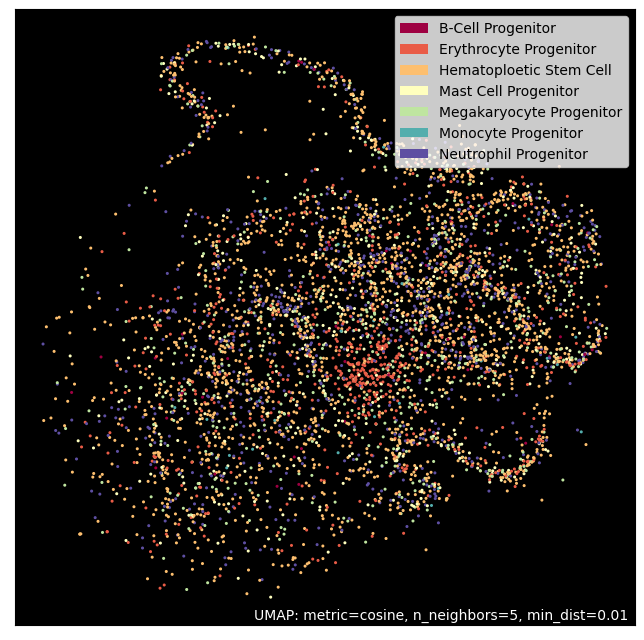

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.05, n_neighbors=10, random_state=20221126, verbose=True)
Thu Dec 29 12:23:45 2022 Construct fuzzy simplicial set
Thu Dec 29 12:23:48 2022 Finding Nearest Neighbors
Thu Dec 29 12:23:48 2022 Building RP forest with 9 trees
Thu Dec 29 12:24:11 2022 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	Stopping threshold met -- exiting after 7 iterations
Thu Dec 29 12:25:36 2022 Finished Nearest Neighbor Search
Thu Dec 29 12:25:37 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Dec 29 12:25:46 2022 Finished embedding


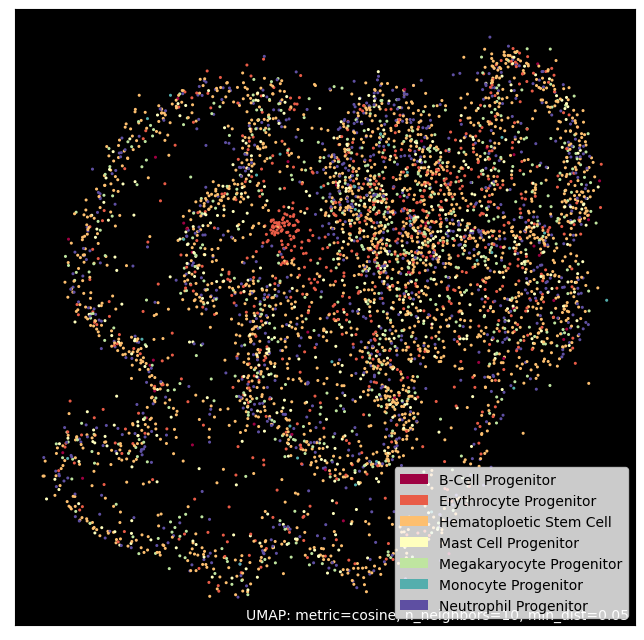

UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=50, random_state=20221126, verbose=True)
Thu Dec 29 12:26:03 2022 Construct fuzzy simplicial set
Thu Dec 29 12:26:06 2022 Finding Nearest Neighbors
Thu Dec 29 12:26:06 2022 Building RP forest with 9 trees
Thu Dec 29 12:26:26 2022 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Thu Dec 29 12:34:18 2022 Finished Nearest Neighbor Search
Thu Dec 29 12:34:19 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Dec 29 12:34:34 2022 Finished embedding


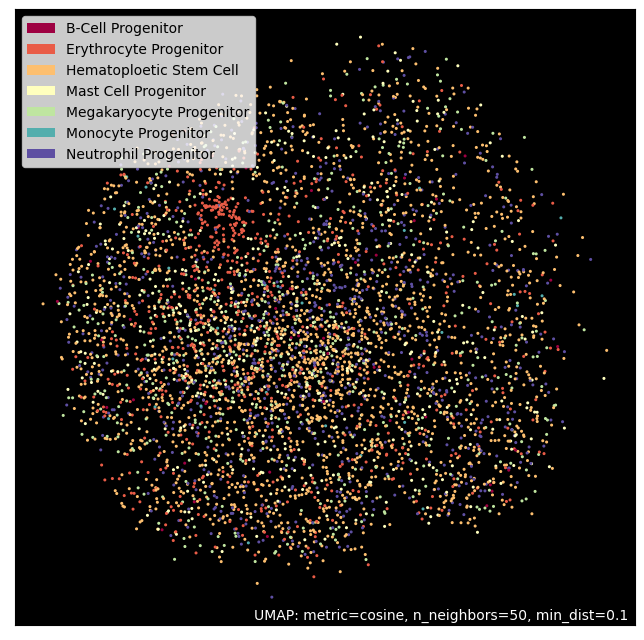

UMAP(angular_rp_forest=True, metric='cosine', min_dist=1, n_neighbors=100, random_state=20221126, verbose=True)
Thu Dec 29 12:34:51 2022 Construct fuzzy simplicial set
Thu Dec 29 12:34:54 2022 Finding Nearest Neighbors
Thu Dec 29 12:34:54 2022 Building RP forest with 9 trees
Thu Dec 29 12:35:08 2022 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Thu Dec 29 12:58:46 2022 Finished Nearest Neighbor Search
Thu Dec 29 12:59:05 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Dec 29 13:03:29 2022 Finished embedding


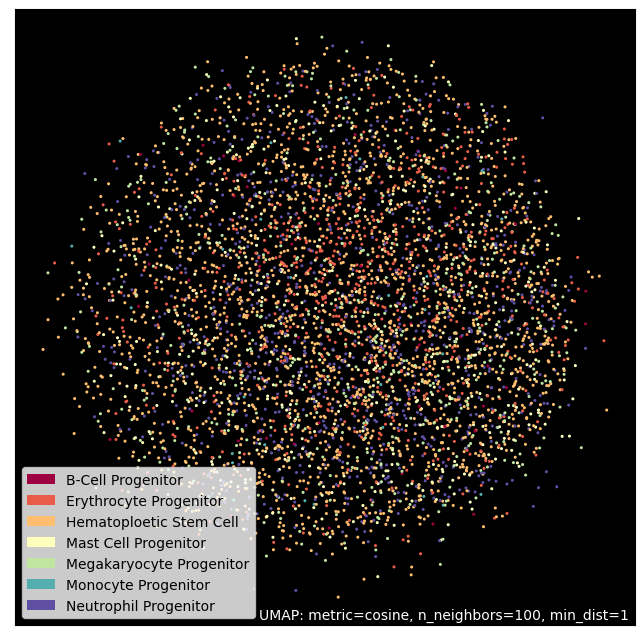

In [9]:
for i,j in zip([5,10,50,100,200,500],[0.01,0.05,0.1,1]):
    umap_instance = umap.UMAP(
        n_neighbors = i, 
        n_components = 2, 
        metric = 'cosine', 
        metric_kwds = None, 
        output_metric = 'euclidean', 
        output_metric_kwds = None, 
        n_epochs = None, 
        learning_rate = 1.0, 
        init = 'spectral', 
        min_dist = j, 
        spread = 1.0, 
        low_memory = True, 
        n_jobs = -1, 
        set_op_mix_ratio = 1.0, 
        local_connectivity = 1.0, 
        repulsion_strength = 1.0, 
        negative_sample_rate = 5, 
        transform_queue_size = 4.0, 
        a = None, 
        b = None, 
        random_state = 20221126, 
        angular_rp_forest = False, 
        target_n_neighbors = -1, 
        target_metric = 'categorical', 
        target_metric_kwds = None, 
        target_weight = 0.5, 
        transform_seed = 42, 
        transform_mode = 'embedding', 
        force_approximation_algorithm = False, 
        verbose = True, 
        tqdm_kwds = None, 
        unique = False, 
        densmap = False, 
        dens_lambda = 2.0, 
        dens_frac = 0.3, 
        dens_var_shift = 0.1, 
        output_dens = False, 
        disconnection_distance = None, 
        precomputed_knn = (None, None, None)
    )
    
    umap.plot.points(
        umap_instance.fit(X_merged.iloc[:,:-2]), 
        labels = X_merged["cell_type2"], 
        theme = "viridis"
    )
    
    plt.show()